L'objectif du TP est :

- d'implémenter l'estimation du flot optique par la méthode de Lucas-Kanade : l'estimation se fera uniquement en certains points de l'image, obtenus grâce à la fonction cv.goodFeaturesToTrack

- d'utiliser une fonction de OpenCV pour l'estimation dense du flot optique cv.calcOpticalFlowFarneback

- de comparer les 2 estimations obtenues.

On appliquera l'estimation de mouvement entre les 2 images ci-dessous, et on l'affichera soit sous forme de champ de vecteurs ou comme une image HSV.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

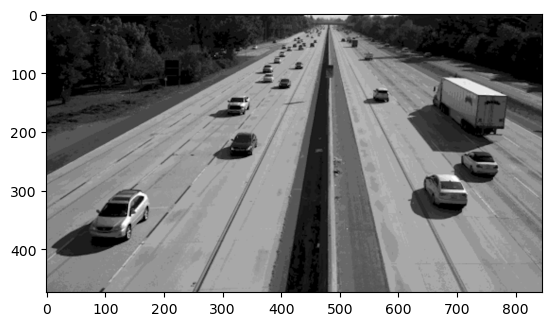

In [2]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
plt.imshow(img1,cmap='gray')

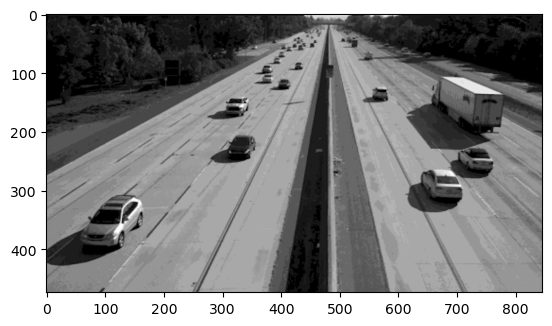

In [3]:
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
plt.imshow(img2,cmap='gray')

In [21]:
corner1=cv.goodFeaturesToTrack(img1,maxCorners=500, qualityLevel=0.03, minDistance=1)
corner2=cv.goodFeaturesToTrack(img2,maxCorners=500, qualityLevel=0.03, minDistance=1)
corner1=corner1.astype(int)
corner1=corner1.reshape((len(corner1), 2))
corner2=corner2.astype(int)
corner2=corner2.reshape((len(corner2), 2))

In [13]:
# corner1=list(corner1)
# temp=[]
# for point in corner1:
#     x, y = point
#     if img1.shape[0]<x or img1.shape[1]<y:
#         temp.append(point)
# corner1=np.array(temp)

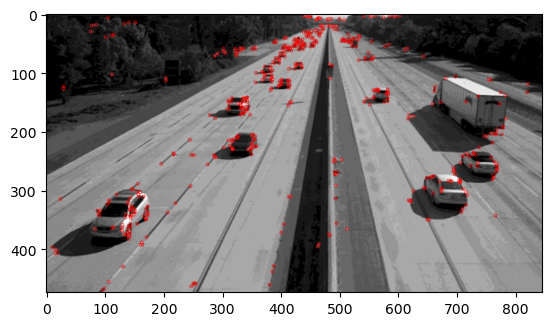

In [6]:
img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
for i in corner1: cv.circle(img1,center=(i[0],i[1]),radius=3,color=[255,0,0],thickness=1)
plt.imshow(img1,cmap='gray')

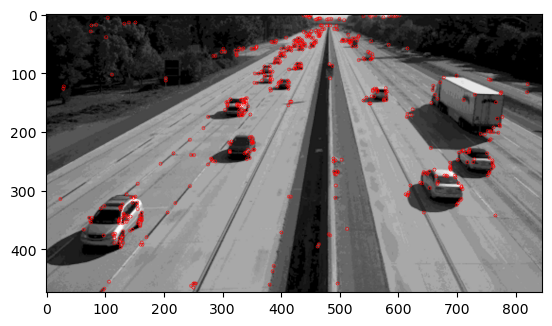

In [7]:
img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
for i in corner2: cv.circle(img2,center=(i[0],i[1]),radius=3,color=[255,0,0],thickness=1)
plt.imshow(img2,cmap='gray')

In [8]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
flow=cv.calcOpticalFlowFarneback(img1,img2,None, 0.5, 3, 15, 3, 5, 1, 0)

In [9]:
u=flow[:,0]
v=flow[:,1]

In [ ]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
plt.imshow(img1,cmap='gray')
S=img1.shape
for i in range(S[0]):
        for j in range(S[1]):
            if abs(v[i][0])>5e-1 or abs(v[i][1])>5e-1:
                plt.arrow(j,i,15*v[i][0],15*v[i][0], head_width = 2, head_length = 4, color = "r")
plt.show()


KeyboardInterrupt



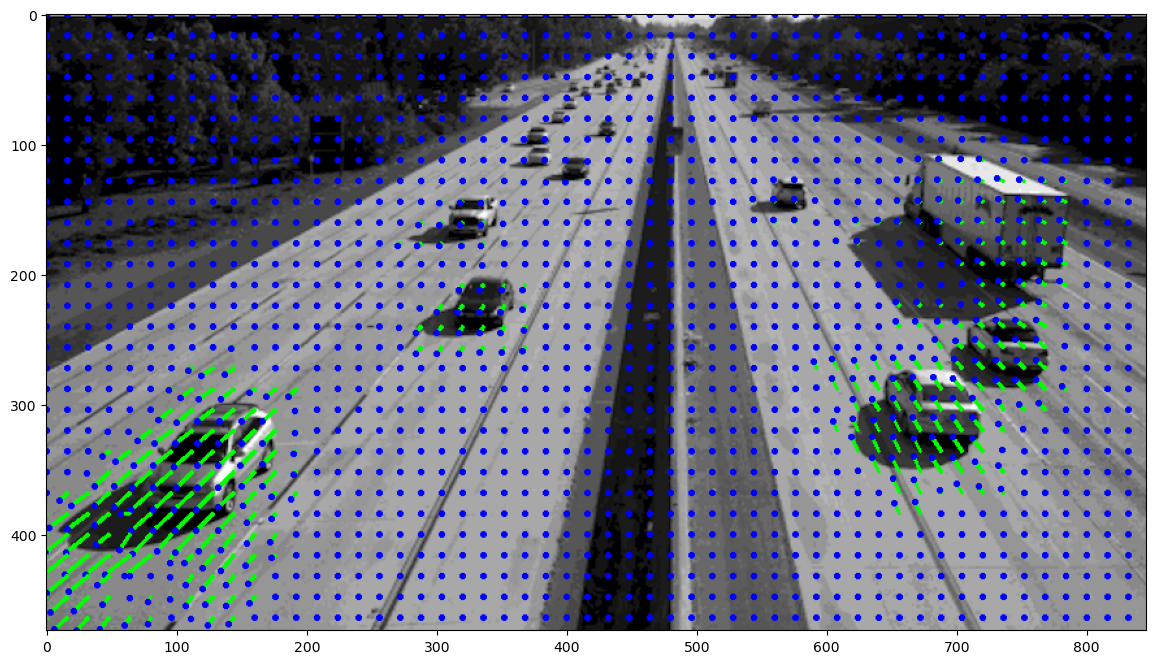

In [231]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
def visualize_flow_with_arrows(image1, image2, step=16, scale=1.0):
    flow = cv.calcOpticalFlowFarneback(image1, image2, None, 0.5, 3, 15, 3, 5, 1, 0)
    #flow=flow_optique(img1,img2)
    vis = cv.cvtColor(image1, cv.COLOR_GRAY2BGR)
    h, w = image1.shape
    plt.figure(figsize=(16,8))
    for y in range(0, h, step):
        for x in range(0, w, step):
            fx, fy = flow[y, x]
            endx, endy = x + int(fx*scale), y + int(fy*scale)
            # Draw the line
            cv.line(vis, (x, y), (endx, endy), (0, 255, 0), 2)
            # Draw the arrow head
            cv.circle(vis, (endx, endy), 1, (0, 0, 255), 2)

    plt.imshow(vis)
visualize_flow_with_arrows(img1, img2, step=16, scale=1.0)

# Ma methode

In [236]:
from scipy import signal 
def flow_optique(img1,img2):
        corner1=cv.goodFeaturesToTrack(img1,maxCorners=600, qualityLevel=0.01, minDistance=1)
        corner1=corner1.astype(int)
        corner1=corner1.reshape((len(corner1), 2))
        gradienx=signal.convolve2d(img1,[[-1,1],[-1,1]],"same")+signal.convolve2d(img2,[[-1,1],[-1,1]],"same")
        gradieny=signal.convolve2d(img1,[[-1,-1],[1,1]],"same")+signal.convolve2d(img2,[[-1,-1],[1,1]],"same")
        A=[]
        b=[]
        #v={}
        v=np.zeros((img1.shape[0],img1.shape[1],2))
        for i in corner1:
            voisins=[(i[0]+k,i[1]+l) for k in [-1,1,0] for l in [-1,1,0] if k*l+k+l!=0]
            for voisin in voisins:
                A.append([gradienx[voisin[1],voisin[0]],gradieny[voisin[1],voisin[0]]])
                b.append((img2-img1)[voisin[1],voisin[0]])
            A=np.array(A)
            b=np.array(b)
            v[i[1],i[0]]=list(np.linalg.inv(A.T@A)@A.T@b)
            b=[]
            A=[]
        return  v

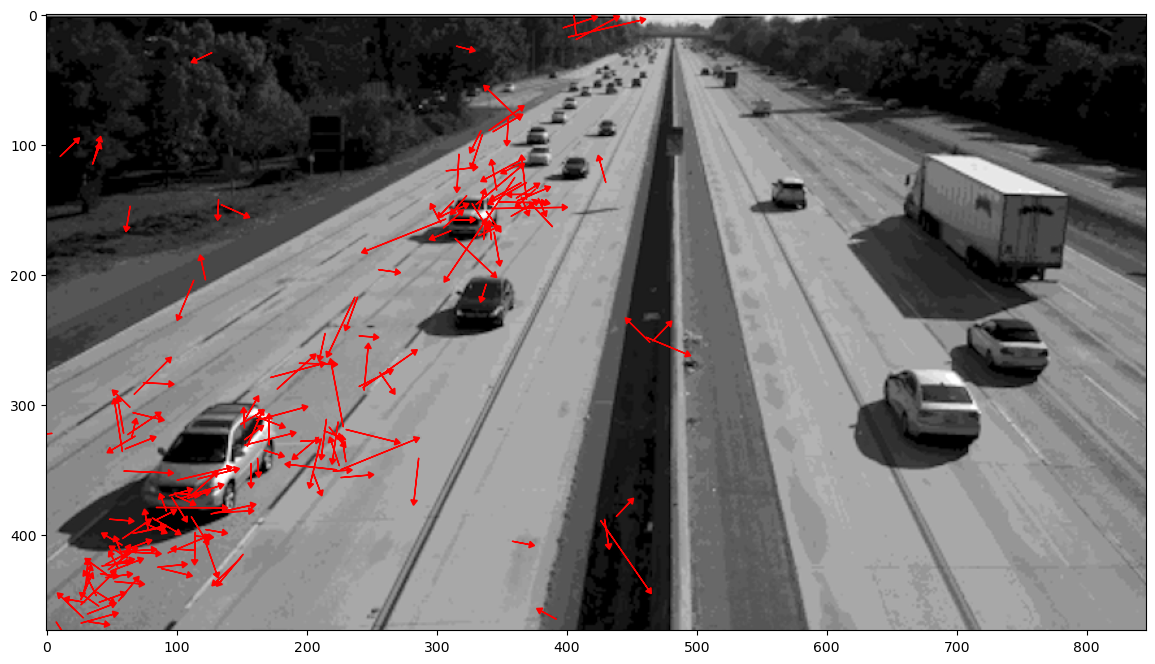

In [240]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
v=flow_optique(img1,img2)
plt.figure(figsize=(16,8))
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if abs(v[i,j][0])>1 or abs(v[i,j][1])>1:
            plt.arrow(i,j,10*v[i,j][0],10*v[i,j][1], head_width = 5, head_length = 4, color = "r")
plt.imshow(img1,cmap='gray')